# Ejercicios resueltos:
Aquí os ofrecemos una posible solución de los ejercicios propuestos:

# Numpy and matplotlib

1. Crea 3 arrays con numpy uno que contenga 100 cincos. Otros que contenga valores de 15 a 155 (incluyendo el ambos), en intervalos de 5 (15, 20, 25) y otro que contenga 100 números aleatorios que sigan una distribución de Poisson.

In [7]:
import numpy as np
array1 = np.ones(100) * 5  # o array1 = np.zeros(100) + 5
array2 = np.arange(15,156,5)
array3 = np.random.poisson(size=100)

2. Haz una lista o un diccionario con el número de horas a la semana que pasas en el trabajo, durmiendo, dedicas a cosas placenteras para tí y las horas que dedicas a otro tipo de responsabilidades. Haz un gráfico de en forma de tarta que lo represente. 

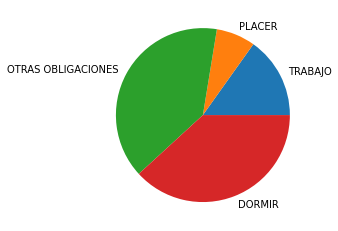

In [98]:
hours = ['TRABAJO', 'PLACER', 'OTRAS OBLIGACIONES',
        'DORMIR']
 
# durmiendo 9 * 7 días, trabajando 5*5, placer 15, el resto otras obligaciones
semana = 24 * 7 
otras = 24 * 7 - 25 - 15 - 63

data = [25, 12, otras, 63]

pl.pie(data, labels = hours);

3. Carga con `loadtxt` el fichero fdata.txt. Este fichero da la cotización de una empresa para 4 días (3-6 octubre), con información de la fecha, datos de la apertura, los máximos, los mínimos, y los de cierre

3.1. Haz un plot donde aparezcan los datos de apertura, maximo, minimo y cierre respecto a la fecha con distintos colores y con su leyenda, nombre de los ejes. 

3.2. Haz las mismas gráficas pero ahora en 4 gráficos distintos, donde se entienda claramente que se representa en cada  subplot. 

Comprueba que las gráficas se ven correctamente y guárdalas. 

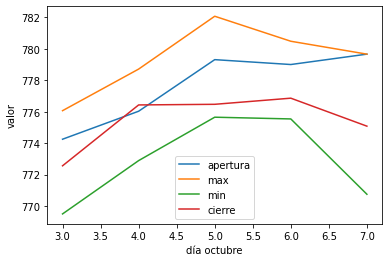

In [27]:
import matplotlib.pyplot as pl 
fdata = np.loadtxt('fdata.csv',delimiter =',')
pl.plot(fdata[:,0],fdata[:,1],label = 'apertura')
pl.plot(fdata[:,0],fdata[:,2],label = 'max')
pl.plot(fdata[:,0],fdata[:,3],label = 'min')
pl.plot(fdata[:,0],fdata[:,4],label = 'cierre')
pl.legend();
pl.xlabel('día octubre'); # este formato se podría mejorar
pl.ylabel('valor');

4. Descara el fichero [núcleos de población](https://raw.githubusercontent.com/blancojc/pythonforbigdata/master/UC_Curso_de_Verano/Dia2/Pandas/Ejercicio1/Centroides_NucleosPoblacion.csv) y responde a las siguientes preguntas:

* Cuantos municipios tienen menos de 11000 habitantes? 

* Haz un programa que encuentre cuántos habitantes suman los municipios de un mismo código postal. 

* Haz una gráfica con eje x código postal y eje y la suma de habitantes de sus municipios

léelo con pandas, pero pasa la columna con la que vayas a trabajar a un array y encuentra el resultado con numpy.

4.1 Si quieres repite el ejercicio pero solo usando pandas.

In [93]:
# 4 
df = pd.read_csv( "https://raw.githubusercontent.com/blancojc/pythonforbigdata/master/UC_Curso_de_Verano/Dia2/Pandas/Ejercicio1/Centroides_NucleosPoblacion.csv" )
pob = np.array(df["Poblacion"])
cod = np.array(df["CodMun"])
NumMunLow = len(np.where(pob<11000)[0])
print('Hay ' + str(NumMunLow) + ' municipios con menos de 11000 habitantes')

Hay 60 municipios con menos de 11000 habitantes


In [94]:
codPost = np.unique(cod)
TotPob = np.zeros(len(codPost))

for i,code in enumerate(codPost):
    pos = np.where(cod == code)
    TotPob[i] = pob[pos].sum()

Text(0.5, 0, 'código postal')

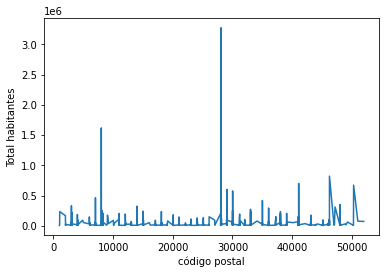

In [97]:
pl.plot(codPost,TotPob)
pl.ylabel('Total habitantes')
pl.xlabel('código postal')


# Estadística

1. Escribe dos funciones " a mano" una que te calcule la moda de unos datos y otra la skewness con las definiciones dadas en la notebook.
Lanza números aleatorios con una distribución normal con 100 números con media = 2 y dispersión = 1. Visualizalos, mirala y piensa que información puedes sacar de solo observala. Usa tus funciones para calcular la moda y la skewness de esos datos. Compara el resultado si tienes 10000 números.
Haz lo mismo para una función gamma con shape = 3 y 1000 números.
Compara los ejercicios con la función mode y skewness de los paquetes de estadística dados en la notebook.

In [77]:
# posibe solución 1.1 
def skewness(data):
    m = np.mean(data)
    n = len(data)
    std = np.std(data)
    return sum((data-m)**3)/(n*std**3)

def moda(data):
    dct = {}
    #redondeamos y buscamos los elementos sin repetir
    #si no reondeamos tenemos cada elemento solo 1 vez.
    data_round = np.round(data,1)
    data_unique = np.unique(data_round)
    for elem in data_unique:
        pos = np.where(data_round == elem)
        dct[elem] = len(pos[0])
    
    return max(dct, key=dct.get)

gauss1 =  1.3 -0.57
gauss2 =  2.0 -0.01


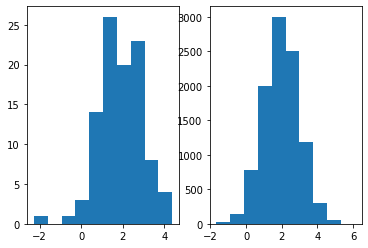

In [78]:
# 1.2
import matplotlib.pyplot as pl
gauss1 = np.random.normal(2,1, size = 100)
gauss2 = np.random.normal(2,1, size=10000)
pl.subplot(1,2,1)
pl.hist(gauss1)
pl.subplot(1,2,2)
pl.hist(gauss2)
mod = moda(gauss1)


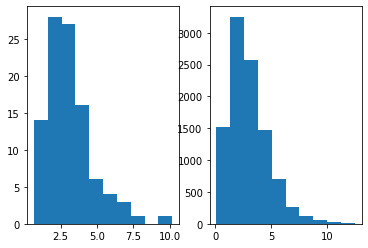

In [86]:
import matplotlib.pyplot as pl
gamma1 = np.random.gamma(3, size = 100)
gamma2 = np.random.gamma(3, size=10000)
pl.subplot(1,2,1)
pl.hist(gamma1)
pl.subplot(1,2,2)
pl.hist(gamma2)
mod = moda(gamma1)

In [87]:
#1.4
#Esperaría que para la función gaussiana la moda me diera 2 y 
#la skewness 0 porque es simétrica. Para las funciones gamma espero 
#que la moda de menor a 3 y la skewness positiva porque tiene 
#la cola de la derecha más larga. 

In [89]:
# 1.4
sk = skewness(gauss1)
print('gauss1 biuse = ' , np.round(mod,2),np.round(sk,2))
mod = moda(gauss2)
sk = skewness(gauss2)
print('gauss2 biuse = ' , np.round(mod,2),np.round(sk,2))
# comprobamos que da con los otros paquetes
import scipy.stats as st
import statistics as stat
      
mod = stat.mode(gauss1)
sk = st.skew(gauss1)
print('gauss1 python = ' , np.round(mod,2),np.round(sk,2))
mod = stat.mode(gauss2)
sk = st.skew(gauss2)
print('gauss2 pyhton= ' , np.round(mod,2),np.round(sk,2))   
        

gauss1 biuse =  1.2 -0.57
gauss2 biuse =  2.0 -0.01
gauss1 python =  2.27 -0.57
gauss2 pyhton=  1.2 -0.01


In [90]:

sk = skewness(gamma1)
print('gamma1 biuse = ' , np.round(mod,2),np.round(sk,2))
mod = moda(gamma2)
sk = skewness(gamma2)
print('gamma2 biuse = ' , np.round(mod,2),np.round(sk,2))
mod = stat.mode(gamma1)
sk = st.skew(gamma1)
print('gamma1 pyhton = ' , np.round(mod,2),np.round(sk,2))
mod = stat.mode(gamma2)
sk = st.skew(gamma2)
print('gamma2 python = ' , np.round(mod,2),np.round(sk,2))

gamma1 biuse =  1.2 1.41
gamma2 biuse =  2.6 1.14
gamma1 pyhton =  2.01 1.41
gamma2 python =  1.95 1.14


1.5
Conclusiones: La moda es algo dificil de definir y distintas estimadores puede dar distintas soluciones, skewness tiene función definida más clara. Me fío más de la mía porque obtengo moda 2 en el caso gauss2 que es lo que debería dar...

Cuantos mayor sea la población mayor mejor serán las estimaciones de las medidas estadísticas.

La distribución normal o Gaussiana es simétrica por lo que la skewness es 0. La función gamma tiene la skewness positiva porque tiene una cola a la derecha. 